# **Solving nonlinear equations**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython import display
from base64 import b64decode


When it comes to solving equations, there are only handful of types for which we can actually work on paper to obtain the analytical solution. Using numerical methods to obtain a reasonable approximations to the solutions thus is of great importance. Notice the following equations in one variable which are extremely hard or impossible to solve analytically.
* $e^x=x^2$
* $\sin(x^2)=x^2+2x+3$
* $\sin^3(x)+2\sin^2(x)+\cos(x)=5e^{\cos(x)}$

In multiple variables, it only gets worse. In a later chapter on numerical integration, we will want a solution $(x_1,x_2,w_1,w_2)$ to the system
$$\begin{align*}
w_1+w_2 &=2,\\
w_1x_1 +w_2x_2 &=0,\\
w_1x_1^2+w_2x_2^2 &= \frac{2}{3},\\
w_1x_1^3+w_2x_2^3 &=0.
\end{align*}$$

# **Method of Bisection**

### **Intermediate Value Theorem**
Suppose a function $f$ is continuous on  $[a,b]$, and $f(a) \cdot f(b) < 0$. Then there exists a number $c$ in the interval $(a,b)$ such that $f(c) =0$.

### **Exercise**
1) Does the function $f(x) = \cos(x) - e^x$ have a root in the interval $[-2,-0.5]$?
2) Can we guess another interval where solution to $f(x) = 0$ may exist?

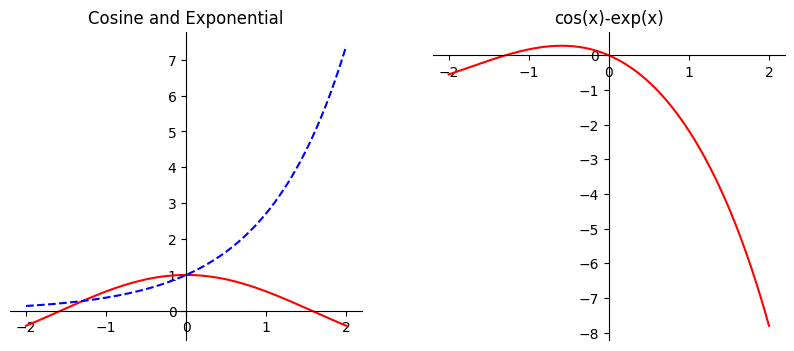

In [ ]:
# @title
x=np.linspace(-2,2,300)                          # define a vector for input variables for the graph
y1=np.cos(x)                                          # define output variable for first function
y2=np.exp(x)                                     # define output variable for second function

fig=plt.figure(figsize=(10,4))                                 # define a figure object for all plotting commands to operate on
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Cosine and Exponential')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y1,'r',x,y2,'b--')                    # creates the graph for the figure object

ax = fig.add_subplot(1, 2, 2)
ax.set_title('cos(x)-exp(x)')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.plot(x,y1-y2,'r')                    # creates the graph for the figure object
plt.show()                                       # display the graph

## **Algorithm**

```
1. Guess initial interval [a,b] such that f(a)f(b) < 0.

2. Set c = (a+b)/2

3. If f(c)=0 (or close enough), c is the root.
4. Else if f(a)f(c) < 0, root is between a and c.
        Set new value of b as c.
5. Else if f(c)f(b) < 0, root is between c and b.
        Set new value of a as c.
6. Repeat from step (2) with new a and b.
```

### **Exercise:**
Find the root of $f(x) = \cos{x} - e^x$ in the interval $[-2,-0.5]$ using the bisection method.

### **Python Implementation**

In [ ]:
def function(x):
    return np.cos(x) - np.exp(x)

def functionDerivative(x):
    return (-np.sin(x)-np.exp(x))

In [ ]:
# Method of bisection
def bisect(a,b,func,tol):
    fa = func(a)
    fb = func(b)
    x = 0

    count=0
    data = np.array([count,a,b,fa,fb])

    while abs(fb)>tol:
        x=(a+b)/2
        fx=func(x)
        count+=1
        if fa*fx<=0:
            b=x
            fb=fx
        if fx*fb<0:
            a=x
            fa=fx
        datanew = np.array([count, a, b, fa, fb])
        data = np.vstack((data,datanew))
    return x, data

In [ ]:
x, data = bisect(-2,-0.5,function,10**(-3))
print(tabulate(data, headers=['#', 'a', 'b', 'f(a)', 'f(b)'],
               tablefmt='orgtbl'))
print("Solution : ",x)

|   # |        a |        b |        f(a) |        f(b) |
|-----+----------+----------+-------------+-------------|
|   0 | -2       | -0.5     | -0.551482   | 0.271052    |
|   1 | -2       | -1.25    | -0.551482   | 0.0288176   |
|   2 | -1.625   | -1.25    | -0.251089   | 0.0288176   |
|   3 | -1.4375  | -1.25    | -0.104619   | 0.0288176   |
|   4 | -1.34375 | -1.25    | -0.0357649  | 0.0288176   |
|   5 | -1.29688 | -1.25    | -0.00287615 | 0.0288176   |
|   6 | -1.29688 | -1.27344 | -0.00287615 | 0.013128    |
|   7 | -1.29688 | -1.28516 | -0.00287615 | 0.00516429  |
|   8 | -1.29688 | -1.29102 | -0.00287615 | 0.00115353  |
|   9 | -1.29395 | -1.29102 | -0.00085896 | 0.00115353  |
|  10 | -1.29395 | -1.29248 | -0.00085896 | 0.000147875 |
Solution :  -1.29248046875


# **Regula Falsi method**

It is a bracketing method, similar to the Bisection method, but instead of dividing the interval in half, it uses a linear interpolation between the two endpoints to estimate the root.


Suppose $f(a)$ and $f(b)$ are of opposite signs, i.e. $f(a) \cdot f(b) <0$.

Instead of bisecting this interval, draw a line connecting the points $(a,f(a))$ and $(b,f(b))$ and choose the $x$-intercept of the line as the next approximation.

## **Algorithm**
```
1. Choose a and b such that f(a)f(b)<0.

2. Compute the approximation:
    x = (af(b)-bf(a))/(f(b)-f(a))

3. Evaluate f(x).
    If f(a)f(x)<0, set b=x.
    If f(b)f(x)<0, set a=x.

4. Repeat from step (2) until the error |f(x)| or |b-a| is within tolerance.
```

### **Exercise:**
Find the root of $f(x) = \cos{x} - e^x$ in the interval $[-2,-0.5]$ using the Regula Falsi method.

In [ ]:
def function(x):
    return np.cos(x) - np.exp(x)

def functionDerivative(x):
    return (-np.sin(x)-np.exp(x))

In [ ]:
# Method of bisection
def regula_falsi(a,b,func,tol):
    fa = func(a)
    fb = func(b)
    x=0

    count=0
    data = np.array([count,a,b,fa,fb])

    while abs(fb)>tol:
        x=(a*fb -b*fa)/(fb-fa)
        fx=func(x)
        count+=1
        if fa*fx<=0:
            b=x
            fb=fx
        if fx*fb<0:
            a=x
            fa=fx
        datanew = np.array([count, a, b, fa, fb])
        data = np.vstack((data,datanew))
    return x, data

In [ ]:
x, data = regula_falsi(-2,-0.5,function,10**(-6))
print(tabulate(data, headers=['#', 'a', 'b', 'f(a)', 'f(b)'],
               tablefmt='orgtbl'))
print("Solution : ",x)

|   # |   a |         b |      f(a) |        f(b) |
|-----+-----+-----------+-----------+-------------|
|   0 |  -2 | -0.5      | -0.551482 | 0.271052    |
|   1 |  -2 | -0.994299 | -0.551482 | 0.175108    |
|   2 |  -2 | -1.23667  | -0.551482 | 0.0375927   |
|   3 |  -2 | -1.28539  | -0.551482 | 0.00500767  |
|   4 |  -2 | -1.29182  | -0.551482 | 0.000604084 |
|   5 |  -2 | -1.29259  | -0.551482 | 7.19107e-05 |
|   6 |  -2 | -1.29268  | -0.551482 | 8.54659e-06 |
|   7 |  -2 | -1.29269  | -0.551482 | 1.01557e-06 |
|   8 |  -2 | -1.2927   | -0.551482 | 1.20675e-07 |
Solution :  -1.2926955437312941


# **Error Convergence (Iterative Methods)**

How fast does the iterative error decreases with each iteration?

OR

How many iterations will I need for the solution to be accurate?

### **Definition:**
Let $e_n$ be the error in $n$-th iteration of an algorithm. That is,
$$ e_n = |x_n - \alpha| .$$
We say the iteration converges with order $p$, for a constant $ 0 < C < \infty$, if,

$$\lim\limits_{n \rightarrow \infty} \frac{e_{n+1}}{e_n^p} = C < \infty,$$

with $C<1$ for $p=1$.



In other words,
$$e_{n+1} = O(e_n^p) \;\;\; \text{ as }\;\;\; n \rightarrow \infty$$


If $p=1$ we call the convergence "linear", if $p=2$ it is "quadratic".

### **Numerical estimation of order of error convergence**

Note that,
$$e_n \approx C e_{n-1}^p$$
$$e_{n+1} \approx C e_{n}^p$$
Hence,
$$\frac{e_{n+1}}{e_n} = \left( \frac{e_n}{e_{n-1}} \right)^p $$
So, we can numerically estimate the value of $p$ as
$$p \approx \frac{\ln \left( \frac{e_{n+1}}{e_n} \right) }{ \ln \left( \frac{e_n}{e_{n-1}} \right)} $$

### **Exercise:**
Solve for a root of
$$f(x) = x^3 - x-2$$
in the interval $[1,2]$ using both bisection and regula-falsi method and output the error for first 10 iterations.

The real root of the equation is,
$$ x = \left(1+ \sqrt{\frac{26}{27}} \right)^{1/3}+\left(1- \sqrt{\frac{26}{27}} \right)^{1/3}$$

In [ ]:
def bisect2(a,b,func,iter):
    fa = func(a)
    fb = func(b)
    x = 0

    for i in range(iter):
        x = (a+b)/2
        fx = func(x)

        if fa*fx <= 0:
            b = x
            fb = fx
        if fb*fx < 0:
            a = x
            fa = fx

    return x

In [ ]:
def rf2(a,b,func,iter):
    fa = func(a)
    fb = func(b)
    x = 0
    for i in range(iter):
        x = (a*fb-b*fa)/(fb-fa)
        fx = func(x)

        if fa*fx < 0:
            b = x
            fb = fx
        if fb*fx < 0:
            a = x
            fa = fx
    return x

In [ ]:
def func(x):
    return x**3-x-2

In [ ]:
a1 = 1
b1 = 2

a2 = 1
b2 = 2

max_iter = 10

real_root = (1+(26/27)**(1/2))**(1/3)+(1-(26/27)**(1/2))**(1/3)
print(f"{'    Bisection':20s}  |  {'    Regula-Falsi':20s}  |  {'   Err. Bisect.':15s}  | {'   Err. R.F.':15s}")
print("-"*90)
for i in range(max_iter):
    b = bisect2(a1,b1,func, i)
    err_b = abs(b - real_root)
    rf = rf2(a2,b2,func,i)
    err_rf = abs(rf - real_root)

    print(f"{float(b):20.16f}  |  {float(rf):20.16f}  |  {float(err_b):15e}  |  {float(err_rf):15e}")

    Bisection         |      Regula-Falsi      |     Err. Bisect.  |    Err. R.F.   
------------------------------------------------------------------------------------------
  0.0000000000000000  |    0.0000000000000000  |     1.521380e+00  |     1.521380e+00
  1.5000000000000000  |    1.3333333333333333  |     2.137971e-02  |     1.880464e-01
  1.7500000000000000  |    1.4626865671641789  |     2.286203e-01  |     5.869314e-02
  1.6250000000000000  |    1.5040190039499490  |     1.036203e-01  |     1.736070e-02
  1.5625000000000000  |    1.5163305647602632  |     4.112029e-02  |     5.049142e-03
  1.5312500000000000  |    1.5199185500233559  |     9.870293e-03  |     1.461157e-03
  1.5156250000000000  |    1.5209574813719307  |     5.754707e-03  |     4.222254e-04
  1.5234375000000000  |    1.5212577491262853  |     2.057793e-03  |     1.219577e-04
  1.5195312500000000  |    1.5213444842315229  |     1.848457e-03  |     3.522257e-05
  1.5214843750000000  |    1.5213695345376019  |  

# **Newton's Method**

Newton's Method (or the Newton-Raphson method) is one of the most powerful iterative techniques for solving nonlinear equations of the form

$$f(x)=0,$$

where $f$ is a differentiable function.

### **Iteration Formula**

Starting with an initial guess $x_0$, the method generates a sequence:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
	​

### **Note:**
Using Taylor series we get the following linear approximation of f(x) locally by its tangent line at $x_n$:
$$ f(x) \approx f(x_n)+f'(x_n)(x-x_n).$$

Setting the tangent line equal to zero gives us the next iteration point:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

### **Error Convergence**

* Local convergence: If $f$ is sufficiently smooth and $f'(\alpha)$ at the root $\alpha$, then Newton's method converges starting from a point sufficiently close to $\alpha$.

* Order of convergence: **Quadratic**, i.e.
$$ |x_{n+1} - \alpha| \approx C|x_n-\alpha|^2$$
for some constant $C$.

### **Exercise:**
Use Newton's method to solve $e^x-x^2 = 0$ using initial guess $x_0 = -1$ and tolerence $10^{-14}$

In [ ]:
#Newton's method
def newtons(x0,function,functionDerivative,tol):
    error = 1
    count=0
    data = np.array([0,x0])
    while error>tol:
        count+=1
        xnew = x0 - function(x0)/functionDerivative(x0)
        error = np.abs(xnew-x0)
        x0=xnew
        datanew = np.array([count, xnew])
        data = np.vstack((data,datanew))
    return xnew,data

In [ ]:
def function(x):
    return np.exp(x)-x**2
def functionDerivative(x):
    return np.exp(x)-2*x

x,data = newtons(-1,function, functionDerivative, 10**(-14))
for i in range(len(data[:,1])):
    print(data[i,1])
print("Solution = {:.14f}".format(x))

-1.0
-0.7330436052454454
-0.703807786324133
-0.7034674683317975
-0.7034674224983924
-0.7034674224983917
Solution = -0.70346742249839


### Can Newton's method fail?
* **Vanishing derivatives:**<br>
If $f'(x) \approx 0$ the tangent line either has no zero or one that is very far away. The method becomes unstable and diverges.
* **Cycles:**<br>
The iteration oscillates between two points and never converges.
Example: $f(x) = x^3 - 2x +2$ with $x_0=0.$

# **Secant Method**


The Secant Method is an iterative technique for solving nonlinear equations of the form

$$f(x)=0,$$

similar to Newton's Method, but it avoids computing the derivative $f'(x)$. Instead, it approximates the derivative using finite difference.

### **Iteration:**
Given two initial approximations $x_0$ and $x_1$, the iteration is:
$$ x_{n+1} = x_n - f(x_n) \cdot \frac{x_n-x_{n-1}}{f(x_n) - f(x_{n-1})}. $$

### **Error Convergence**
* Order of convergence: <br>
**Superlinear** with order approximately $p=1.618$ (golden ratio).<br>
That is,
$$ |x_{n+1} - \alpha| \approx C|x_n-\alpha|^p, \;\;\;\;\; p = \frac{1+\sqrt{5}}{2}.$$
for some constant $C$.
* Slower than Newton's Method (quadratic), but faster than Bisection (linear).

In [ ]:
# Secant Method
def secant(x0,x1,function,tol):
    error = 1
    count=0
    data = np.array([0,x0,x1])
    while error>tol:
        count+=1
        xnew = x1 - function(x1)/((function(x1)-function(x0))/(x1-x0))
        error = np.abs(xnew-x1)
        x0=x1
        x1=xnew
        datanew = np.array([count, x0,x1])
        data = np.vstack((data,datanew))
    return xnew,data

In [ ]:
x, data = secant(-2,-0.5,function,10**(-6))
print(tabulate(data, headers=['#', 'x0', 'x1'], tablefmt='orgtbl'))
print("Solution : ",x)

|   # |        x0 |        x1 |
|-----+-----------+-----------|
|   0 | -2        | -0.5      |
|   1 | -0.5      | -0.626693 |
|   2 | -0.626693 | -0.710172 |
|   3 | -0.710172 | -0.70326  |
|   4 | -0.70326  | -0.703467 |
|   5 | -0.703467 | -0.703467 |
Solution :  -0.7034674225436495


# **Fixed Point Iteration**

* A **fixed point** is a point in the domain of a function $g$ such that $g(x)=x$.
* The fixed point iteration method uses the concept of a fixed point in a repeated manner to compute the solution of the given equation.
* In fixed point iteration method, the given equation $f(x)=0$ is algebraically converted to the form $x = g(x)$
* Starting with an initial $x_0$ the process follows the iteration step:
$$x_{n+1} = g(x_n).$$

**Note:**
* The process of transforming $f(x)=0$ to $x=g(x)$ is not unique.
* For the fixed point iteration to converge,
$$|g'(x)| < 1$$

### **Order of Convergence**

* The convergence is linear if $0 < |g'(x^*)| < 1.$
* If $g'(x^*) = 0$, convergence can be quadratic.

### **Exercise:**
Find the approximate root of the equation $ 2x^3 - 2x - 5=0$ up to $4$ decimal places.

**Note:**
There are more than one way to rewrite the equation.<br>
Whch one of these is a better way?
* $ x = \frac{2x^3-5}{2}$
* $ x = \left( \frac{2x+5}{2} \right)^{1/3}$

# **Solving Equations in Higher Dimensions**

Recall the problem consisting of a system of equation,
$$\begin{align*}
w_1+w_2 &=2,\\
w_1x_1 +w_2x_2 &=0,\\
w_1x_1^2+w_2x_2^2 &= \frac{2}{3},\\
w_1x_1^3+w_2x_2^3 &=0.
\end{align*}$$
**Objective:** Find a solution $(x_1,x_2,w_1,w_2)$ to the above system.


**Note:** This system can be rewritten as $$\mathbf{f}(\mathbf{x})=0$$

where $\mathbf{f}=<f_1,f_2,f_3,f_4>$ and $\mathbf{x}=<x_1,x_2,w_1,w_2>$ such that,

$$
\begin{align*}
f_1(x_1,x_2,w_1,w_2)&=w_1+w_2-2\\
f_2(x_1,x_2,w_1,w_2)&=w_1x_1 +w_2x_2\\
f_3(x_1,x_2,w_1,w_2)&=w_1x_1^2+w_2x_2^2-\frac{2}{3}\\
f_4(x_1,x_2,w_1,w_2)&=w_1x_1^3+w_2x_2^3
\end{align*}
$$

# **Jacobian** (Derivative in Higher Dimension)

Let us first define the Jacobian for a given function $\mathbf{f}:\mathbb{R} ^n \rightarrow \mathbb{R} ^m$ where $\mathbf{f}=\mathbf{f}(\mathbf{x})=<f_1(x_1 \cdots x_n), \cdots f_m(x_1, \cdots x_n)>$. <br>

The Jacobian for $\vec{f}$ is defined as,
    \begin{align*}
        \mathbf{J} = \nabla \mathbf{f} &= \bigg[\frac{\delta \vec{f}}{\delta x_1},\frac{\delta \vec{f}}{\delta x_2} \cdots, \frac{\delta \vec{f}}{\delta x_n} \bigg] \\
        &=
        \begin{pmatrix}
            \frac{\delta f_1}{\delta x_1}&\frac{\delta f_1}{\delta x_2}& \;\;\; \cdots& \;\;\; \frac{\delta f_1}{\delta x_n}\\
            \frac{\delta f_2}{\delta x_1}&\frac{\delta f_2}{\delta x_2}& \;\;\; \cdots& \;\;\; \frac{\delta f_m}{\delta x_n}\\
            &&\;\;\; \vdots & \;\;\;\\
            \frac{\delta f_m}{\delta x_1}&\frac{\delta f_m}{\delta x_2}& \;\;\; \cdots& \;\;\; \frac{\delta f_m}{\delta x_n}
        \end{pmatrix}
    \end{align*}

# **Newton's Method in Higher Dimensions**

### **Newton's Method in 1-dimension:**
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

We can extend this to higher dimensions,

### **Newton's Method for Higher Dimensions:**
$$\mathbf{x}_{k+1} = \mathbf{x}_k - \left( \nabla \mathbf{f}(\mathbf{x}_k) \right)^{-1} \mathbf{f}(\mathbf{x}_k)$$

For a system with 2 variables and 2 equations
$$\mathbf{f}(\mathbf{x}) = (f_1(x_1,x_2),f_2(x_1,x_2))$$

Jacobian:
$$
\nabla \mathbf{f} =
\begin{pmatrix}
\frac{\partial f_1 }{\partial x_1} & \frac{\partial f_1 }{\partial x_2}\\
\frac{\partial f_2 }{\partial x_1}& \frac{\partial f_2 }{\partial x_2}
\end{pmatrix}
$$

**Exercise:**

Solve the following system of nonlinear equations:
$$
\begin{align*}
    x_1^3=x_2\\
    x_1 + \sin(x_2) = -3
\end{align*}
$$

In [ ]:
def function2D(x):
    return np.array([x[0]**3-x[1],x[0]+np.sin(x[1])+3])

def function2DJacobian(x):
    return np.array([[3*x[0]**2,-1],[1,np.cos(x[1])]])

In [ ]:
def newtons2D(x0,func,funcJac,tol):
    error = 1
    count=0
    data = np.array([count, x0[0], x0[1], error])
    while error>tol and count < 1000:
        count+=1
        xnew = x0 - np.dot(np.linalg.inv(funcJac(x0)), func(x0))
        error = np.linalg.norm(xnew-x0)
        x0=xnew
        datanew = np.array([count, xnew[0], xnew[1], error])
        data = np.vstack((data,datanew))
    return xnew,data

In [ ]:
x0 = np.array([-2, -15])
x,data = newtons2D(x0,function2D, function2DJacobian, 10**(-8))
print(tabulate(data, headers=['#', 'x', 'y','error'], tablefmt='orgtbl'))
print("Solution = ", x)
print("Function = ", function2D(x))

|   # |        x |        y |      error |
|-----+----------+----------+------------|
|   0 | -2       | -15      | 1          |
|   1 | -2.61212 | -15.3454 | 0.70285    |
|   2 | -2.48258 | -15.1713 | 0.216983   |
|   3 | -2.4747  | -15.155  | 0.0181575  |
|   4 | -2.47467 | -15.1549 | 0.00012237 |
|   5 | -2.47467 | -15.1549 | 5.16e-09   |
Solution =  [ -2.47467012 -15.15486052]
Function =  [-5.32907052e-15 -8.88178420e-16]
